In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset=pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.shape

(200, 5)

In [ ]:
x=dataset.iloc[:,[3,4]].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  Kmeans.fit(x)
  wcss.append(Kmeans.inertia_)

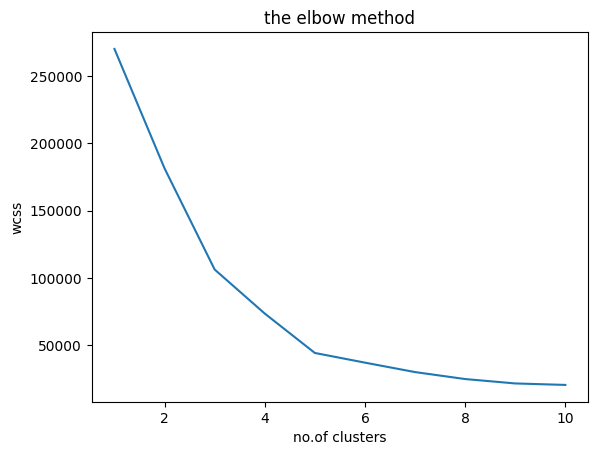

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("no.of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
Kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=Kmeans.fit_predict(x)

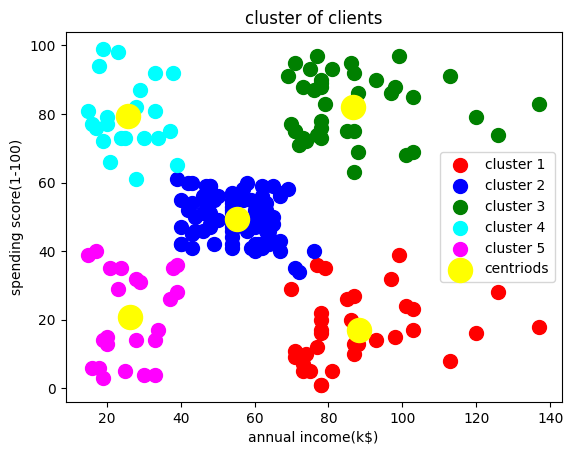

In [ ]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='cluster 5')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centriods')
plt.title('cluster of clients')
plt.xlabel('annual income(k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(x,y_kmeans)
print(f'silhouette score: {silhouette_avg}')

silhouette score: 0.553931997444648


In [ ]:
inertia=Kmeans.inertia_
print(f'inertia:{inertia}')

inertia:44448.4554479337
